Here I am re-mapping 8 crosses done by a former member of the lab to have them part of the same analysis pipeline of my crosses.

In [1]:
source("../../BrusselSprouts/scripts/functions.R")


Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
fastq_dir="~/data/trd/Chris_Data_June20/Reads/"

In [3]:
reference="/home/jnrunge/data/TRD/R64_nucl.fasta"

In [4]:
scripts_dir="/home/jnrunge/data/trd/mapped_reads/scripts/"

In [5]:
fastq_files=list.files(path=fastq_dir,pattern="txt.gz")
fastq_files

[1] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC01ACPxBFP_1_sequence.txt.gz"
 [2] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC01ACPxBFP_2_sequence.txt.gz"
 [3] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC02BAPxCMP_1_sequence.txt.gz"
 [4] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC02BAPxCMP_2_sequence.txt.gz"
 [5] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC03CCDxCPG_1_sequence.txt.gz"
 [6] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC03CCDxCPG_2_sequence.txt.gz"
 [7] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC04ATExYCR_1_sequence.txt.gz"
 [8] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC04ATExYCR_2_sequence.txt.gz"
 [9] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC05ACKxACV_1_sequence.txt.gz"
[10] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC05ACKxACV_2_sequence.txt.gz"
[11] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC06AKExBAH_1_sequence.txt.gz"
[12] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC06AKExBAH_2_sequence.txt.gz"
[13] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC07BAHxCGD_1_sequence.txt.gz"
[14] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC07BAHxCGD_2_sequence.txt.gz"
[15] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC08ANGxCEI_1_sequence.txt.gz"
[16] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC08ANGxCEI_2_sequence.txt.gz"

In [6]:
trimmed_files=list.files(path=paste0(fastq_dir, "trim_galore"),pattern="fq.gz$")
trimmed_files

character(0)

In [7]:
# if >= 1 missing trimmed file

if(length(fastq_files)!=length(trimmed_files))
    {
    cmd=paste0("cd ", fastq_dir, " && trim_galore --paired -o trim_galore -j 10 *gz")
    execute_cmd_sbatch(cmd, mem="8gb", cpu="10", time="long", env="bwaetc", jobname="trim_galore")
}

[1] "sbatch -c 10 --mem=8gb --job-name=trim_galore -p fast -t 119:59:00 --wrap '. ~/activate.sh bwaetc; cd ~/data/trd/Chris_Data_June20/Reads/ && trim_galore --paired -o trim_galore -j 10 *gz'"
[1] "Submitted batch job 481621"


In [8]:
trimmed_files=list.files(path=paste0(fastq_dir, "trim_galore"),pattern="fq.gz$")
trimmed_files

[1] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC01ACPxBFP_1_sequence.txt.gz_val_1.fq.gz"
 [2] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC01ACPxBFP_2_sequence.txt.gz_val_2.fq.gz"
 [3] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC02BAPxCMP_1_sequence.txt.gz_val_1.fq.gz"
 [4] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC02BAPxCMP_2_sequence.txt.gz_val_2.fq.gz"
 [5] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC03CCDxCPG_1_sequence.txt.gz_val_1.fq.gz"
 [6] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC03CCDxCPG_2_sequence.txt.gz_val_2.fq.gz"
 [7] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC04ATExYCR_1_sequence.txt.gz_val_1.fq.gz"
 [8] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC04ATExYCR_2_sequence.txt.gz_val_2.fq.gz"
 [9] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC05ACKxACV_1_sequence.txt.gz_val_1.fq.gz"
[10] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC05ACKxACV_2_sequence.txt.gz_val_2.fq.gz"
[11] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC06AKExBAH_1_sequence.txt.gz_val_1.fq.gz"
[12] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC06AKExBAH_2_sequence.txt.gz_val_2.fq.gz"
[13] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC07BAHxCGD_1_sequence.txt.gz_val_1.fq.gz"
[14] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC07BAHxCGD_2_sequence.txt.gz_val_2.fq.gz"
[15] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC08ANGxCEI_1_sequence.txt.gz_val_1.fq.gz"
[16] "HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC08ANGxCEI_2_sequence.txt.gz_val_2.fq.gz"

In [9]:
# fastqc on trimmed files

for(f in trimmed_files){
    if(file.exists(paste0(fastq_dir,"trim_galore/fastqc/",
                         str_replace(f,fixed(".fq.gz"),"_fastqc.html")))){
        next
    }
    cmd=paste0("cd ",fastq_dir,"trim_galore && fastqc -o fastqc -t 1 -d . ",f,"")
    execute_cmd_sbatch(cmd, mem="4gb", cpu="1", time="short", env="bwaetc", jobname = "FastQC")
    Sys.sleep(1)
}

[1] "sbatch -c 1 --mem=4gb --job-name=FastQC -p fast -t 11:59:00 --wrap '. ~/activate.sh bwaetc; cd ~/data/trd/Chris_Data_June20/Reads/trim_galore && fastqc -o fastqc -t 1 -d . HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC01ACPxBFP_1_sequence.txt.gz_val_1.fq.gz'"
[1] "Submitted batch job 482224"
[1] "sbatch -c 1 --mem=4gb --job-name=FastQC -p fast -t 11:59:00 --wrap '. ~/activate.sh bwaetc; cd ~/data/trd/Chris_Data_June20/Reads/trim_galore && fastqc -o fastqc -t 1 -d . HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC01ACPxBFP_2_sequence.txt.gz_val_2.fq.gz'"
[1] "Submitted batch job 482225"
[1] "sbatch -c 1 --mem=4gb --job-name=FastQC -p fast -t 11:59:00 --wrap '. ~/activate.sh bwaetc; cd ~/data/trd/Chris_Data_June20/Reads/trim_galore && fastqc -o fastqc -t 1 -d . HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC02BAPxCMP_1_sequence.txt.gz_val_1.fq.gz'"
[1] "Submitted batch job 482226"
[1] "sbatch -c 1 --mem=4gb --job-name=FastQC -p fast -t 11

In [14]:
# need to find a smart way of getting sensible IDs

IDs=unlist(lapply(unlist(lapply(trimmed_files, getWhich, which=1, fixed=FALSE, split="[_][0-9][_][s]")), getWhich, which=2, split="lane1"))
IDs=str_replace(IDs, fixed("TRDC0"), "ChrisC")
IDs=unlist(lapply(IDs, getWhich, which=1, fixed=FALSE, split="[A-Z]*[x]"))
IDs

[1] "ChrisC1" "ChrisC1" "ChrisC2" "ChrisC2" "ChrisC3" "ChrisC3" "ChrisC4"
 [8] "ChrisC4" "ChrisC5" "ChrisC5" "ChrisC6" "ChrisC6" "ChrisC7" "ChrisC7"
[15] "ChrisC8" "ChrisC8"

In [15]:
df=data.frame(ID=IDs, file=trimmed_files)
if(nrow(df)%%2 != 0){
    stop("missing files!")
}

In [17]:
initial_timedate=Sys.time()

In [18]:
head(df)

,ID,file
,<chr>,<chr>
1,ChrisC1,HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC01ACPxBFP_1_sequence.txt.gz_val_1.fq.gz
2,ChrisC1,HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC01ACPxBFP_2_sequence.txt.gz_val_2.fq.gz
3,ChrisC2,HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC02BAPxCMP_1_sequence.txt.gz_val_1.fq.gz
4,ChrisC2,HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC02BAPxCMP_2_sequence.txt.gz_val_2.fq.gz
5,ChrisC3,HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC03CCDxCPG_1_sequence.txt.gz_val_1.fq.gz
6,ChrisC3,HNM72BGXF_EP_CE_AT_20200616_20s001718-1-1_Schacherer_lane1TRDC03CCDxCPG_2_sequence.txt.gz_val_2.fq.gz


In [16]:
# this expects 2x75
# needs to include the length detection script from BrusselSprouts

In [19]:
for(ID in unique(df$ID)){
    print(ID)
    
    if(file.exists(paste0("~/data/trd/mapped_reads/",ID,".m.sort.markdup.bam"))){
        next
    }
    
    
    cmd=paste0("cd ",fastq_dir,"trim_galore
bwa mem -t 5 -M -T 0 -a ",reference," ",df$file[df$ID==ID][1], " ",df$file[df$ID==ID][2], " > ~/data/trd/mapped_reads/",ID,".sam
samtools sort -n -m 800M -@ 5 -O BAM -o ~/data/trd/mapped_reads/",ID,".bam ~/data/trd/mapped_reads/",ID,".sam
rm -f ~/data/trd/mapped_reads/",ID,".sam
samtools fixmate -@ 5 -m ~/data/trd/mapped_reads/",ID,".bam ~/data/trd/mapped_reads/",ID,".m.bam
rm -f ~/data/trd/mapped_reads/",ID,".bam
samtools sort -m 800M -@ 5 -O bam -o ~/data/trd/mapped_reads/",ID,".m.sort.bam  ~/data/trd/mapped_reads/",ID,".m.bam 
rm -f ~/data/trd/mapped_reads/",ID,".m.bam
samtools markdup -l 75 -s -@ 5 ~/data/trd/mapped_reads/",ID,".m.sort.bam ~/data/trd/mapped_reads/",ID,".m.sort.markdup.bam
rm -f ~/data/trd/mapped_reads/",ID,".m.sort.bam 
samtools index ~/data/trd/mapped_reads/",ID,".m.sort.markdup.bam")
               
    sbatch_list=execute_complex_sbatch(cmd, jobname = "BWA", scripts_dir = scripts_dir, uniqueRunID = ID, cores="5", mem="5gb", time="short", env="bwaetc", initial_timedate = initial_timedate, jobs_simul = 10, jobs_total = 10)

}

[1] "ChrisC1"
[1] "/home/jnrunge/data/trd/mapped_reads/scripts/BWA-ChrisC1.sbatch"
[1] "ChrisC2"
[1] "/home/jnrunge/data/trd/mapped_reads/scripts/BWA-ChrisC2.sbatch"
[1] "ChrisC3"
[1] "/home/jnrunge/data/trd/mapped_reads/scripts/BWA-ChrisC3.sbatch"
[1] "ChrisC4"
[1] "/home/jnrunge/data/trd/mapped_reads/scripts/BWA-ChrisC4.sbatch"
[1] "ChrisC5"
[1] "/home/jnrunge/data/trd/mapped_reads/scripts/BWA-ChrisC5.sbatch"
[1] "ChrisC6"
[1] "/home/jnrunge/data/trd/mapped_reads/scripts/BWA-ChrisC6.sbatch"
[1] "ChrisC7"
[1] "/home/jnrunge/data/trd/mapped_reads/scripts/BWA-ChrisC7.sbatch"
[1] "ChrisC8"
[1] "/home/jnrunge/data/trd/mapped_reads/scripts/BWA-ChrisC8.sbatch"


In [ ]:
if(exists("sbatch_list")){
    start_sbatch_list(sbatch_list, 10, "BWA", initial_timedate)
    }

In [21]:
bam_files=list.files(path="~/data/trd/mapped_reads",pattern="markdup.bam$",full.names = TRUE)
bam_files=bam_files[!grepl("tmp",bam_files,fixed = TRUE)]
bam_files

[1] "/home/jnrunge/data/trd/mapped_reads/ChrisC1.m.sort.markdup.bam"
 [2] "/home/jnrunge/data/trd/mapped_reads/ChrisC2.m.sort.markdup.bam"
 [3] "/home/jnrunge/data/trd/mapped_reads/ChrisC3.m.sort.markdup.bam"
 [4] "/home/jnrunge/data/trd/mapped_reads/ChrisC4.m.sort.markdup.bam"
 [5] "/home/jnrunge/data/trd/mapped_reads/ChrisC5.m.sort.markdup.bam"
 [6] "/home/jnrunge/data/trd/mapped_reads/ChrisC6.m.sort.markdup.bam"
 [7] "/home/jnrunge/data/trd/mapped_reads/ChrisC7.m.sort.markdup.bam"
 [8] "/home/jnrunge/data/trd/mapped_reads/ChrisC8.m.sort.markdup.bam"
 [9] "/home/jnrunge/data/trd/mapped_reads/JF3x1.m.sort.markdup.bam"  
[10] "/home/jnrunge/data/trd/mapped_reads/JF4.m.sort.markdup.bam"    
[11] "/home/jnrunge/data/trd/mapped_reads/JG4.m.sort.markdup.bam"

In [22]:
for(b in bam_files){
    if(file.exists(paste0(b,".mq.tmp.tsv.gz","-windows.tsv.gz"))){
        next
    }
    cmd=paste0("samtools view ",b," | cut -f 3,4,5 | gzip > ",b,".mq.tmp.tsv.gz")
    cmd=paste0(cmd,"
","conda activate JupyteR4 && Rscript ", "/home/jnrunge/TRD/01_Mapping/01_Mapping-MQ-windows.r ", b,".mq.tmp.tsv.gz")
    cmd=paste0(cmd,"
rm -f ",b,".mq.tmp.tsv.gz")
    print(cmd)
    
    sbatch_list=execute_complex_sbatch(cmd, jobname = "MQ-QC", scripts_dir = scripts_dir, uniqueRunID = basename(b), cores="1", mem="5gb", time="short", env="bwaetc", initial_timedate = initial_timedate, jobs_simul = 10, jobs_total = 10)
}
print(sbatch_list)
start_sbatch_list(sbatch_list, 10, "MQ-QC", initial_timedate)

[1] "samtools view /home/jnrunge/data/trd/mapped_reads/ChrisC1.m.sort.markdup.bam | cut -f 3,4,5 | gzip > /home/jnrunge/data/trd/mapped_reads/ChrisC1.m.sort.markdup.bam.mq.tmp.tsv.gz\nconda activate JupyteR4 && Rscript /home/jnrunge/TRD/01_Mapping/01_Mapping-MQ-windows.r /home/jnrunge/data/trd/mapped_reads/ChrisC1.m.sort.markdup.bam.mq.tmp.tsv.gz\nrm -f /home/jnrunge/data/trd/mapped_reads/ChrisC1.m.sort.markdup.bam.mq.tmp.tsv.gz"
[1] "/home/jnrunge/data/trd/mapped_reads/scripts/MQ-QC-ChrisC1.m.sort.markdup.bam.sbatch"
[1] "samtools view /home/jnrunge/data/trd/mapped_reads/ChrisC2.m.sort.markdup.bam | cut -f 3,4,5 | gzip > /home/jnrunge/data/trd/mapped_reads/ChrisC2.m.sort.markdup.bam.mq.tmp.tsv.gz\nconda activate JupyteR4 && Rscript /home/jnrunge/TRD/01_Mapping/01_Mapping-MQ-windows.r /home/jnrunge/data/trd/mapped_reads/ChrisC2.m.sort.markdup.bam.mq.tmp.tsv.gz\nrm -f /home/jnrunge/data/trd/mapped_reads/ChrisC2.m.sort.markdup.bam.mq.tmp.tsv.gz"
[1] "/home/jnrunge/data/trd/mapped_reads/s

In [23]:
MQ_files=list.files(path="~/data/trd/mapped_reads",pattern="-windows.tsv.gz$",full.names = TRUE)
MQ_files

[1] "/home/jnrunge/data/trd/mapped_reads/ChrisC1.m.sort.markdup.bam.mq.tmp.tsv.gz-windows.tsv.gz"
 [2] "/home/jnrunge/data/trd/mapped_reads/ChrisC2.m.sort.markdup.bam.mq.tmp.tsv.gz-windows.tsv.gz"
 [3] "/home/jnrunge/data/trd/mapped_reads/ChrisC3.m.sort.markdup.bam.mq.tmp.tsv.gz-windows.tsv.gz"
 [4] "/home/jnrunge/data/trd/mapped_reads/ChrisC4.m.sort.markdup.bam.mq.tmp.tsv.gz-windows.tsv.gz"
 [5] "/home/jnrunge/data/trd/mapped_reads/ChrisC5.m.sort.markdup.bam.mq.tmp.tsv.gz-windows.tsv.gz"
 [6] "/home/jnrunge/data/trd/mapped_reads/ChrisC6.m.sort.markdup.bam.mq.tmp.tsv.gz-windows.tsv.gz"
 [7] "/home/jnrunge/data/trd/mapped_reads/ChrisC7.m.sort.markdup.bam.mq.tmp.tsv.gz-windows.tsv.gz"
 [8] "/home/jnrunge/data/trd/mapped_reads/ChrisC8.m.sort.markdup.bam.mq.tmp.tsv.gz-windows.tsv.gz"
 [9] "/home/jnrunge/data/trd/mapped_reads/JF3x1.m.sort.markdup.bam.mq.tmp.tsv.gz-windows.tsv.gz"  
[10] "/home/jnrunge/data/trd/mapped_reads/JF4.m.sort.markdup.bam.mq.tmp.tsv.gz-windows.tsv.gz"    
[11] "/home/jnrunge/data/trd/mapped_reads/JG4.m.sort.markdup.bam.mq.tmp.tsv.gz-windows.tsv.gz"

In [24]:
MQ_df=fread_and_bind_files(MQ_files)
chrs=summarise(group_by(MQ_df, chr),maxPos=max(pos))
MQ_df$global_pos=MQ_df$pos
for(c in 2:length(unique(MQ_df$chr))){
    chr=unique(MQ_df$chr)[c]
    MQ_df$global_pos[MQ_df$chr==chr]=MQ_df$pos[MQ_df$chr==chr]+sum(chrs$maxPos[chrs$chr%in%unique(MQ_df$chr)[1:(c-1)]])
}
head(MQ_df)

,chr,pos,meanMQ,n,file,global_pos
,<chr>,<int>,<dbl>,<int>,<chr>,<int>
1,chromosome1,10001,52.03224,10950,/home/jnrunge/data/trd/mapped_reads/ChrisC1.m.sort.markdup.bam.mq.tmp.tsv.gz-windows.tsv.gz,10001
2,chromosome1,20001,50.94978,2449,/home/jnrunge/data/trd/mapped_reads/ChrisC1.m.sort.markdup.bam.mq.tmp.tsv.gz-windows.tsv.gz,20001
3,chromosome1,30001,51.86585,4644,/home/jnrunge/data/trd/mapped_reads/ChrisC1.m.sort.markdup.bam.mq.tmp.tsv.gz-windows.tsv.gz,30001
4,chromosome1,40001,56.34332,20136,/home/jnrunge/data/trd/mapped_reads/ChrisC1.m.sort.markdup.bam.mq.tmp.tsv.gz-windows.tsv.gz,40001
5,chromosome1,50001,59.28026,14576,/home/jnrunge/data/trd/mapped_reads/ChrisC1.m.sort.markdup.bam.mq.tmp.tsv.gz-windows.tsv.gz,50001
6,chromosome1,60001,59.34670,12714,/home/jnrunge/data/trd/mapped_reads/ChrisC1.m.sort.markdup.bam.mq.tmp.tsv.gz-windows.tsv.gz,60001


In [25]:
MQ_df$ID=unlist(lapply(basename(MQ_df$file), getFirst_v2, split="."))

Warning message:
"Removed 166 rows containing missing values (`geom_point()`)."


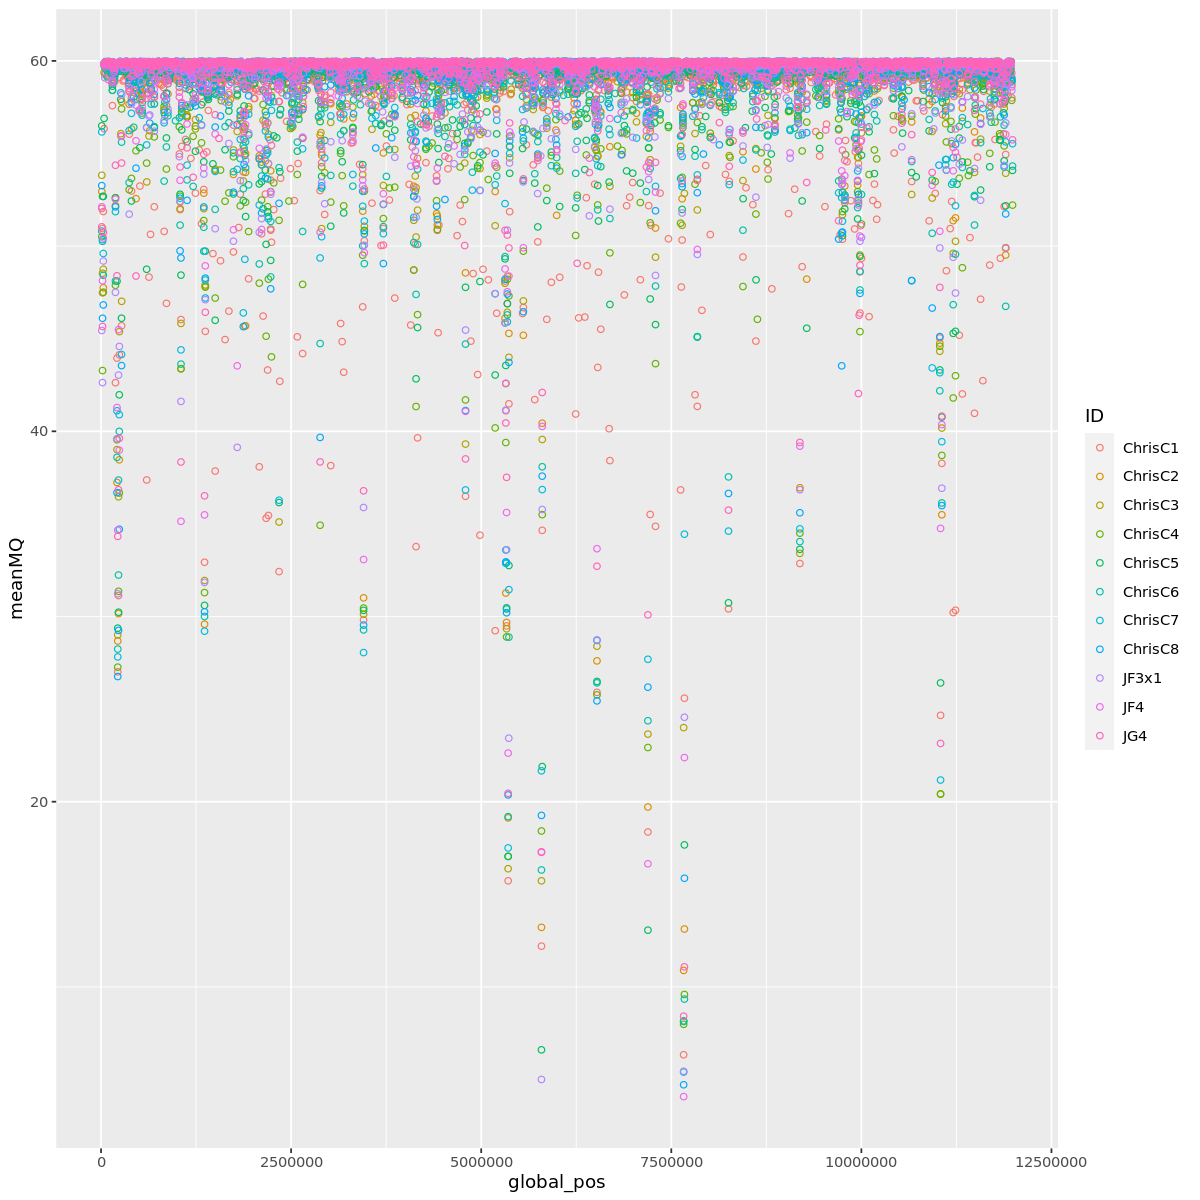

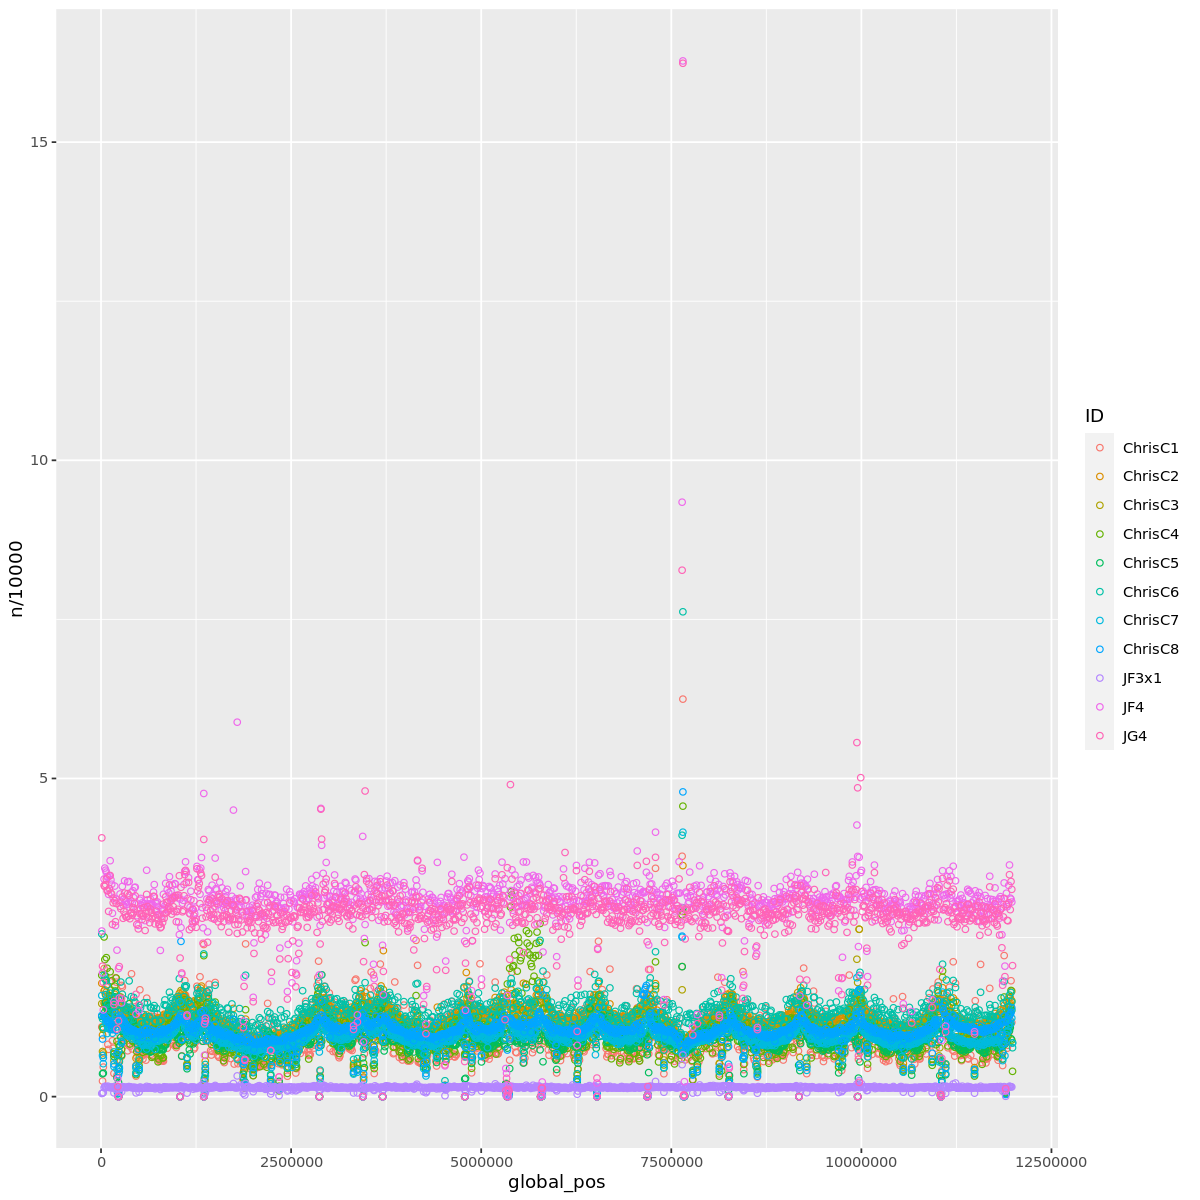

In [26]:
library(ggplot2)
ggplot(MQ_df, aes(global_pos, meanMQ, color=ID))+
geom_point(shape=1)
ggplot(MQ_df, aes(global_pos, n/10000, color=ID))+
geom_point(shape=1)

In [27]:
data.frame(fastq=NA,bam=basename(bam_files),Jname=NA)

fastq,bam,Jname
<lgl>,<chr>,<lgl>
NA,ChrisC1.m.sort.markdup.bam,NA
NA,ChrisC2.m.sort.markdup.bam,NA
NA,ChrisC3.m.sort.markdup.bam,NA
NA,ChrisC4.m.sort.markdup.bam,NA
NA,ChrisC5.m.sort.markdup.bam,NA
NA,ChrisC6.m.sort.markdup.bam,NA
NA,ChrisC7.m.sort.markdup.bam,NA
NA,ChrisC8.m.sort.markdup.bam,NA
NA,JF3x1.m.sort.markdup.bam,NA


In [30]:
# finally, rename BAMs
# need to add sequencing names to Crosses.xlsx
# for the moment:

renaming=data.frame(fastq=NA,bam=basename(bam_files),Jname=NA)
renaming$Jname=c(paste0("ChrisC",1:8,".bam"),"YJNRC2.bam","YJNRC17.bam","YJNRC18.bam")
renaming
setwd(dirname(bam_files[1]))
for(i in 1:nrow(renaming)){
    cmd=paste0("ln -sf ",renaming$bam[i]," ",renaming$Jname[i])
    print(cmd)
    print(system(command=cmd,intern=TRUE))
    cmd=paste0("ln -sf ",renaming$bam[i],".bai ",renaming$Jname[i],".bai")
    print(cmd)
    print(system(command=cmd,intern=TRUE))
}

fastq,bam,Jname
<lgl>,<chr>,<chr>
NA,ChrisC1.m.sort.markdup.bam,ChrisC1.bam
NA,ChrisC2.m.sort.markdup.bam,ChrisC2.bam
NA,ChrisC3.m.sort.markdup.bam,ChrisC3.bam
NA,ChrisC4.m.sort.markdup.bam,ChrisC4.bam
NA,ChrisC5.m.sort.markdup.bam,ChrisC5.bam
NA,ChrisC6.m.sort.markdup.bam,ChrisC6.bam
NA,ChrisC7.m.sort.markdup.bam,ChrisC7.bam
NA,ChrisC8.m.sort.markdup.bam,ChrisC8.bam
NA,JF3x1.m.sort.markdup.bam,YJNRC2.bam


[1] "ln -sf ChrisC1.m.sort.markdup.bam ChrisC1.bam"
character(0)
[1] "ln -sf ChrisC1.m.sort.markdup.bam.bai ChrisC1.bam.bai"
character(0)
[1] "ln -sf ChrisC2.m.sort.markdup.bam ChrisC2.bam"
character(0)
[1] "ln -sf ChrisC2.m.sort.markdup.bam.bai ChrisC2.bam.bai"
character(0)
[1] "ln -sf ChrisC3.m.sort.markdup.bam ChrisC3.bam"
character(0)
[1] "ln -sf ChrisC3.m.sort.markdup.bam.bai ChrisC3.bam.bai"
character(0)
[1] "ln -sf ChrisC4.m.sort.markdup.bam ChrisC4.bam"
character(0)
[1] "ln -sf ChrisC4.m.sort.markdup.bam.bai ChrisC4.bam.bai"
character(0)
[1] "ln -sf ChrisC5.m.sort.markdup.bam ChrisC5.bam"
character(0)
[1] "ln -sf ChrisC5.m.sort.markdup.bam.bai ChrisC5.bam.bai"
character(0)
[1] "ln -sf ChrisC6.m.sort.markdup.bam ChrisC6.bam"
character(0)
[1] "ln -sf ChrisC6.m.sort.markdup.bam.bai ChrisC6.bam.bai"
character(0)
[1] "ln -sf ChrisC7.m.sort.markdup.bam ChrisC7.bam"
character(0)
[1] "ln -sf ChrisC7.m.sort.markdup.bam.bai ChrisC7.bam.bai"
character(0)
[1] "ln -sf ChrisC8.m.sort.markdup